In [10]:
import os
import requests, json
import numpy as np
import matplotlib.pyplot as plt


download files

In [89]:
file_list = ['file_list_tfchip_hg38_bednarrowpeak.txt', 'file_list_atac_hg38_bednarrowpeak.txt', 'file_list_chiapet_hg38_bednarrowpeak.txt', 'file_list_dnase_hg38_bednarrowpeak.txt', 'file_list_histonechip_hg38_bednarrowpeak.txt', 'file_list_tfchip_hg38_bednarrowpeak.txt']
experiment_list_name = file_list[4]
#os.system('xargs -L 1 curl -O -J -L < ' + experiment_list_name)

In [90]:
experiment_list_temp = open(experiment_list_name).readlines()[1:]
experiment_list = []
for experiment_i in experiment_list_temp:
    experiment_list.append(experiment_i.split('files/')[1].split('/@@')[0])
    
print(experiment_list[0:5])

['ENCFF152CYD', 'ENCFF712YGW', 'ENCFF767VOC', 'ENCFF762OOA', 'ENCFF449GNW']


In [91]:
experiment_list = experiment_list[0:100]
experiment_summary = {}
headers = {'accept': 'application/json'}
for experiment_i in experiment_list:
    #print(experiment_i)
    url = 'https://www.encodeproject.org/search/?searchTerm=' + experiment_i + '&frame=object'
    response = requests.get(url, headers=headers)
    experiment_summary[experiment_i] = {}
    for i in range(len(response.json()['@graph'])):
        if('biosample_summary' in response.json()['@graph'][i].keys()):
            experiment_summary[experiment_i]['biobiosample_summary'] = response.json()['@graph'][i]['biosample_summary']
    if('assay_title' in response.json()['@graph'][0]):
        experiment_summary[experiment_i]['assay_title'] = response.json()['@graph'][0]['assay_title']
    if('assembly' in response.json()['@graph'][0]):
        experiment_summary[experiment_i]['assembly'] = response.json()['@graph'][0]['assembly']


In [92]:
cellline_list = []
sequencing_method_list = []
assembly_list = []
for experiment_i in experiment_list:
    if('biobiosample_summary' in list(experiment_summary[experiment_i].keys())):
        cellline_list.append(experiment_summary[experiment_i]['biobiosample_summary'].split(' ')[0])
    if('assay_title' in list(experiment_summary[experiment_i].keys())):
        sequencing_method_list.append(experiment_summary[experiment_i]['assay_title'])
    if('assembly' in list(experiment_summary[experiment_i].keys())):
        assembly_list.append(experiment_summary[experiment_i]['assembly'])

In [93]:
for experiment_i in experiment_list[0:5]:
    print(experiment_summary[experiment_i])

{'biobiosample_summary': 'stomach tissue female adult (53 years)', 'assay_title': 'Histone ChIP-seq', 'assembly': 'GRCh38'}
{'biobiosample_summary': 'stomach tissue female adult (53 years)', 'assay_title': 'Histone ChIP-seq', 'assembly': 'GRCh38'}
{'biobiosample_summary': 'heart left ventricle tissue female adult (53 years)', 'assay_title': 'Histone ChIP-seq', 'assembly': 'GRCh38'}
{'biobiosample_summary': 'neural progenitor cell originated from H9', 'assay_title': 'Histone ChIP-seq', 'assembly': 'GRCh38'}
{'biobiosample_summary': 'hepatocyte originated from H9', 'assay_title': 'Histone ChIP-seq', 'assembly': 'GRCh38'}


In [78]:
#file_list_tfchip_hg38_bednarrowpeak.txt
unique_cellline_list = np.unique(cellline_list)
print(unique_cellline_list)
unique_sequencing_method_list = np.unique(sequencing_method_list)
print(unique_sequencing_method_list)

['A549' 'GM12878' 'GM23338' 'H1' 'HEK293' 'HEK293T' 'HepG2' 'K562' 'MCF-7'
 'SK-N-SH' 'body' 'lower' 'stomach' 'strain' 'suprapubic' 'transverse'
 'upper']
['Histone ChIP-seq' 'TF ChIP-seq']


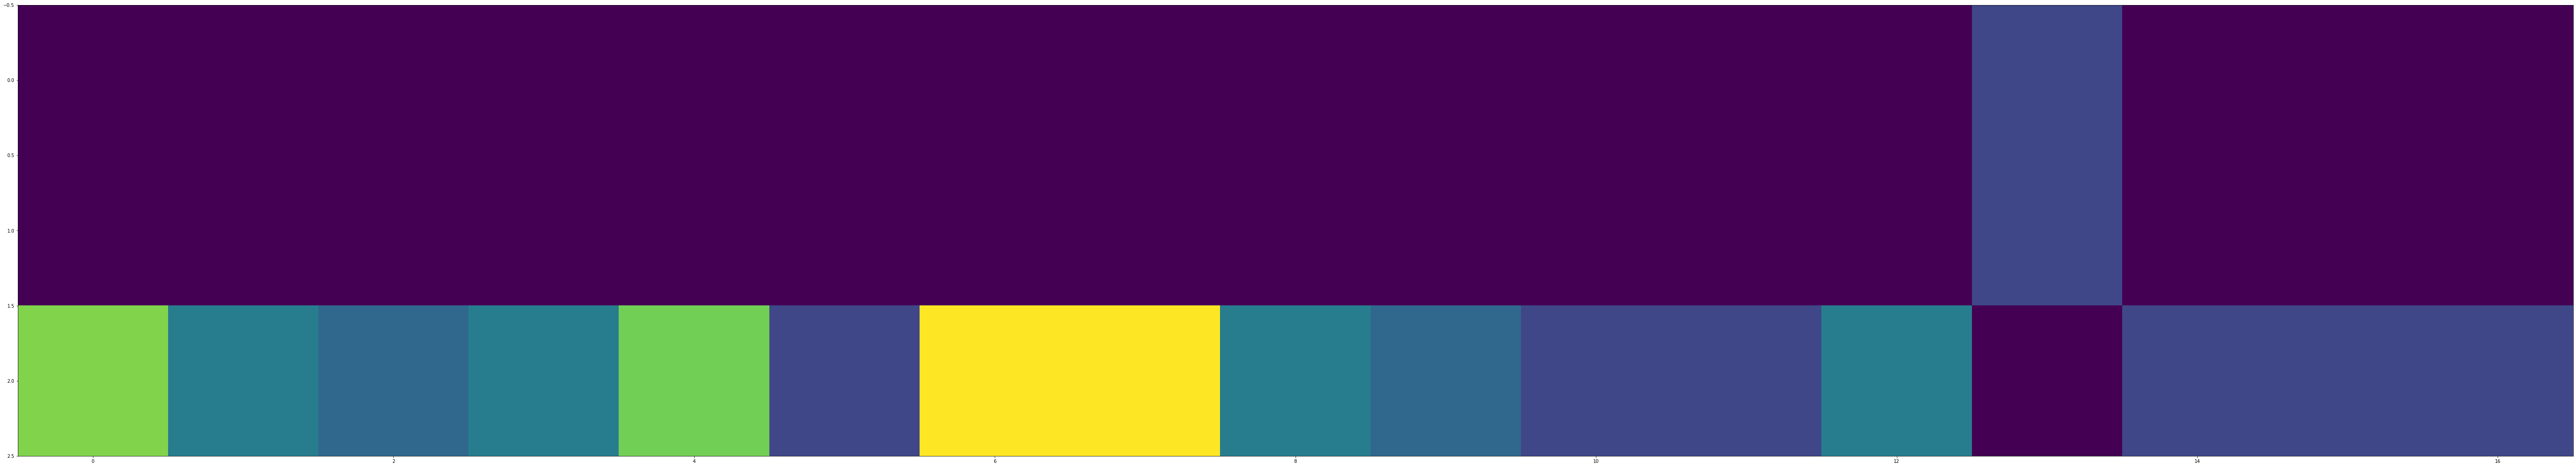

In [47]:
data_availability_summary = np.zeros((len(unique_cellline_list), len(unique_sequencing_method_list)))
for experiment_i in experiment_list:
    if(('biobiosample_summary' in list(experiment_summary[experiment_i].keys())) & ('assay_title' in list(experiment_summary[experiment_i].keys())) & ('assembly' in list(experiment_summary[experiment_i].keys()))):
        index0 = np.where(experiment_summary[experiment_i]['biobiosample_summary'].split(' ')[0] == unique_cellline_list)[0][0]
        index1 = np.where(experiment_summary[experiment_i]['assay_title'] == unique_sequencing_method_list)[0][0]
        data_availability_summary[index0, index1] = data_availability_summary[index0, index1] + 1
fig, ax = plt.subplots(figsize=(100, 20))
ax.imshow(np.log(data_availability_summary + 1).T)

In [52]:
#file_list_atac_hg38_bednarrowpeak.txt
unique_cellline_list = np.unique(cellline_list)
print(unique_cellline_list)
unique_sequencing_method_list = np.unique(sequencing_method_list)
print(unique_sequencing_method_list)

['CD8-positive' 'CD8-positive,' 'GM18519' 'GM18909' 'GM19035' 'GM19395'
 'GM19467' 'HFFc6' 'HG02884' 'HG03469' 'HepG2' 'Right' 'activated'
 'adrenal' 'body' 'breast' 'cerebellum' 'dendritic' 'esophagus' 'foreskin'
 'gastrocnemius' 'gastroesophageal' 'heart' 'left' 'mesenteric' 'mucosa'
 'omental' 'ovary' 'pancreas' 'posterior' 'prostate' 'psoas' 'right'
 'sciatic' 'sigmoid' 'stomach' 'strain' 'subcutaneous' 'thoracic'
 'thyroid' 'tibial' 'transverse' 'uterus']
['ATAC-seq' 'TF ChIP-seq' 'shRNA RNA-seq']


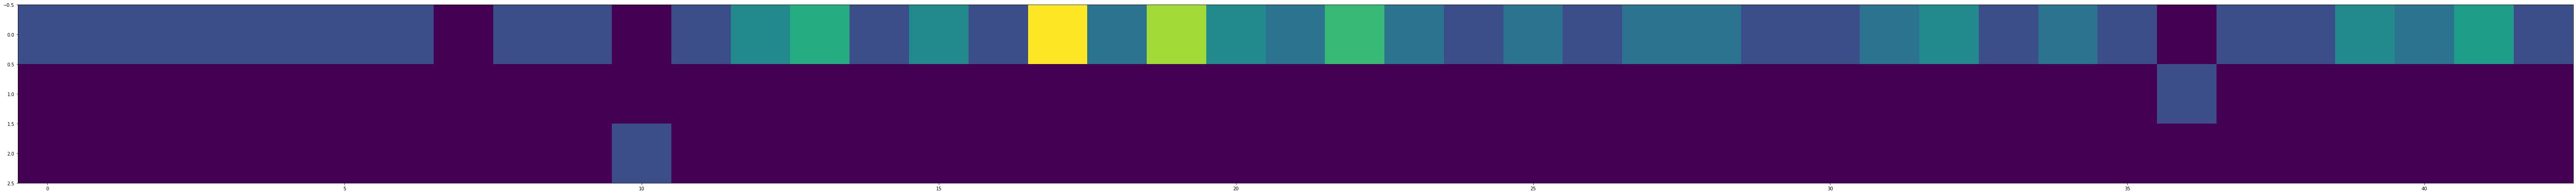

In [53]:
data_availability_summary = np.zeros((len(unique_cellline_list), len(unique_sequencing_method_list)))
for experiment_i in experiment_list:
    if(('biobiosample_summary' in list(experiment_summary[experiment_i].keys())) & ('assay_title' in list(experiment_summary[experiment_i].keys())) & ('assembly' in list(experiment_summary[experiment_i].keys()))):
        index0 = np.where(experiment_summary[experiment_i]['biobiosample_summary'].split(' ')[0] == unique_cellline_list)[0][0]
        index1 = np.where(experiment_summary[experiment_i]['assay_title'] == unique_sequencing_method_list)[0][0]
        data_availability_summary[index0, index1] = data_availability_summary[index0, index1] + 1
fig, ax = plt.subplots(figsize=(100, 20))
ax.imshow(np.log(data_availability_summary + 1).T)

In [68]:
#file_list_dnase_hg38_bednarrowpeak.txt
unique_cellline_list = np.unique(cellline_list)
print(unique_cellline_list)
unique_sequencing_method_list = np.unique(sequencing_method_list)
print(unique_sequencing_method_list)

['CD4-positive' 'CD4-positive,' 'Caco-2' 'HL-60' 'L1-S8R' 'MCF' 'T-cell'
 'T-helper' 'WERI-Rb-1' 'activated' 'adrenal' 'aorta' 'effector'
 'gastrocnemius' 'head' 'heart' 'kidney' 'left' 'lower' 'mesothelial'
 'middle' 'naive' 'ovary' 'placenta' 'posterior' 'right' 'sigmoid'
 'spleen' 'stomach' 'testis' 'transverse' 'upper' 'ureter' 'uterus']
['Control Mint-ChIP-seq' 'DNase-seq' 'Histone ChIP-seq']


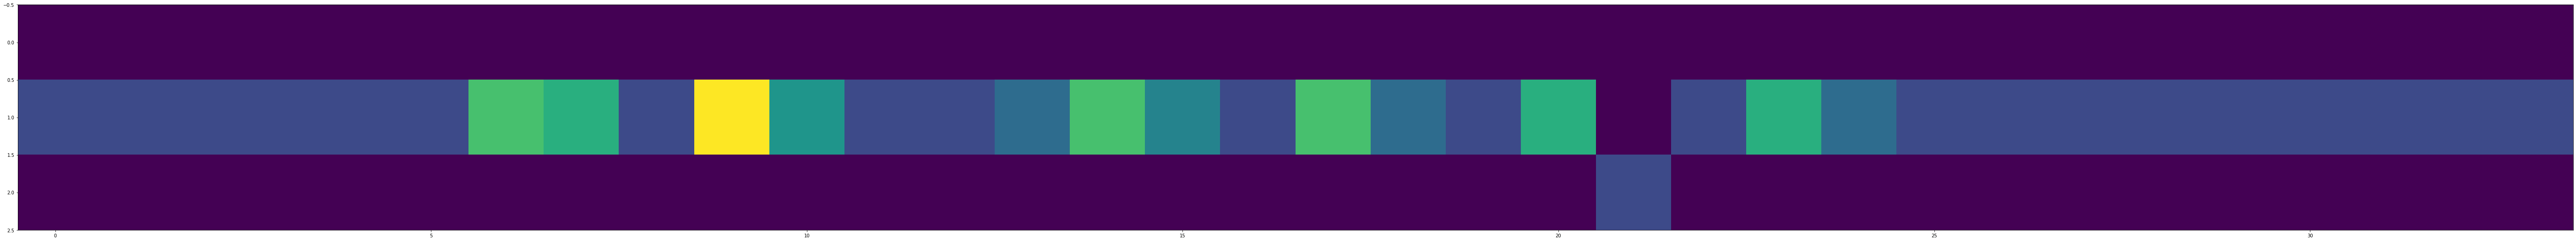

In [69]:
data_availability_summary = np.zeros((len(unique_cellline_list), len(unique_sequencing_method_list)))
for experiment_i in experiment_list:
    if(('biobiosample_summary' in list(experiment_summary[experiment_i].keys())) & ('assay_title' in list(experiment_summary[experiment_i].keys())) & ('assembly' in list(experiment_summary[experiment_i].keys()))):
        index0 = np.where(experiment_summary[experiment_i]['biobiosample_summary'].split(' ')[0] == unique_cellline_list)[0][0]
        index1 = np.where(experiment_summary[experiment_i]['assay_title'] == unique_sequencing_method_list)[0][0]
        data_availability_summary[index0, index1] = data_availability_summary[index0, index1] + 1
fig, ax = plt.subplots(figsize=(100, 20))
ax.imshow(np.log(data_availability_summary + 1).T)

In [94]:
#file_list_histonechip_hg38_bednarrowpeak.txt
unique_cellline_list = np.unique(cellline_list)
print(unique_cellline_list)
unique_sequencing_method_list = np.unique(sequencing_method_list)
print(unique_sequencing_method_list)

['A549' 'B' 'HepG2' 'PC-3' "Peyer's" 'SK-N-SH' 'adrenal' 'ascending'
 'body' 'breast' 'chorionic' 'coronary' 'esophagus' 'gastrocnemius'
 'gastroesophageal' 'heart' 'hepatocyte' 'left' 'motor' 'mucosa' 'neural'
 'neurosphere' 'placenta' 'placental' 'prostate' 'right' 'sigmoid' 'skin'
 'smooth' 'spleen' 'stomach' 'suprapubic' 'testis' 'thyroid' 'tibial'
 'transverse' 'trophoblast' 'upper' 'vagina']
['Histone ChIP-seq' 'Mint-ChIP-seq' 'TF ChIP-seq']


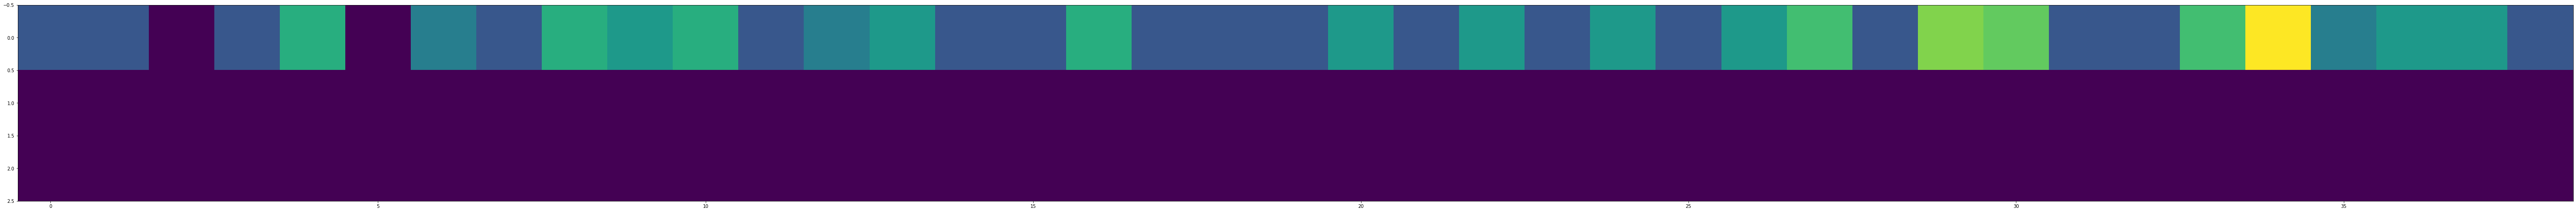

In [95]:
data_availability_summary = np.zeros((len(unique_cellline_list), len(unique_sequencing_method_list)))
for experiment_i in experiment_list:
    if(('biobiosample_summary' in list(experiment_summary[experiment_i].keys())) & ('assay_title' in list(experiment_summary[experiment_i].keys())) & ('assembly' in list(experiment_summary[experiment_i].keys()))):
        index0 = np.where(experiment_summary[experiment_i]['biobiosample_summary'].split(' ')[0] == unique_cellline_list)[0][0]
        index1 = np.where(experiment_summary[experiment_i]['assay_title'] == unique_sequencing_method_list)[0][0]
        data_availability_summary[index0, index1] = data_availability_summary[index0, index1] + 1
fig, ax = plt.subplots(figsize=(100, 20))
ax.imshow(np.log(data_availability_summary + 1).T)